Dataset

In [26]:
# Fruits.zip

Imports

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(rescale= 1/255,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True)

In [29]:
train_datagen = ImageDataGenerator(rescale= 1/ 255)

In [30]:
test_datagem= ImageDataGenerator(rescale= 1/ 255)

Read the Images

In [31]:
train = train_datagen.flow_from_directory('../Dataset/training_set',
                                          target_size=(64,64),
                                          class_mode='binary')

train.filenames

Found 13 images belonging to 2 classes.


['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

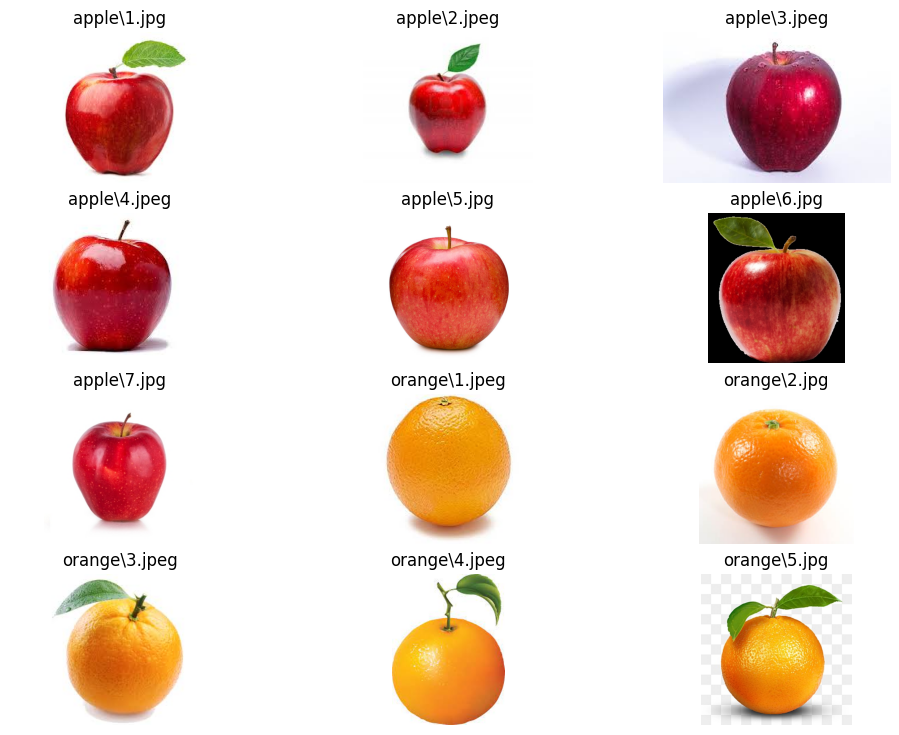

In [32]:
i =1
plt.figure(figsize=(12, 9))
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory + '/'+ fname)
    plt.subplot(4, 3, i)
    plt.axis('off')
    i +=1
    plt.title(fname.split('//')[0])
    plt.imshow(img)

In [33]:
test = test_datagem.flow_from_directory('../Dataset/test_set',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 6 images belonging to 2 classes.


Build the CNN Model

In [39]:
model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3, 3),
                 activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 8, kernel_size= (3, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Model Summary

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 16)               

Compile Model

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
train.class_indices

{'apple': 0, 'orange': 1}

Train the Model

In [43]:
model.fit(train, epochs= 20, validation_data= test)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6940 - accuracy: 0.5385 - val_loss: 0.6560 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 284ms/step - loss: 0.6519 - accuracy: 0.5385 - val_loss: 0.6363 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 251ms/step - loss: 0.6212 - accuracy: 0.5385 - val_loss: 0.6096 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 319ms/step - loss: 0.5929 - accuracy: 0.5385 - val_loss: 0.5816 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 246ms/step - loss: 0.5589 - accuracy: 0.6154 - val_loss: 0.5473 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 269ms/step - loss: 0.5196 - accuracy: 0.6923 - val_loss: 0.5171 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 343ms/step - loss: 0.4860 - accuracy: 0.6923 - val_loss: 0.4929 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=======

Predict class of unseen data

In [44]:
import cv2

In [96]:
img = plt.imread('../Dataset/sample2.jpg')

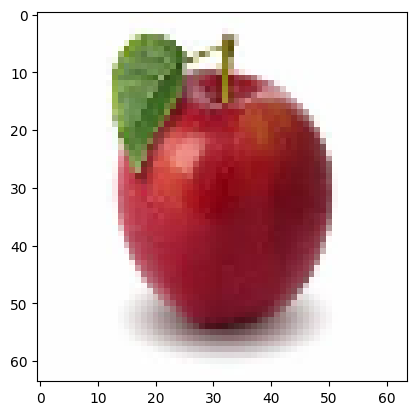

In [97]:
img = cv2.resize(img, (64, 64))
plt.imshow(img)

In [98]:
new = img.reshape(1, 64, 64, 3)
# new = new/255
# new

In [99]:
pred = model.predict(new)[0][0]
if pred == 0.0:
    print('Apple')
else:
    print('Orange')

1/1 [==============================] - 0s 26ms/step
Apple


{'apple': 0, 'orange': 1}
1/1 [==============================] - 0s 47ms/step


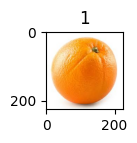

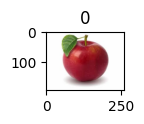

In [117]:
import os
from os import listdir
import cv2
import numpy as np
# get the path/directory

print(train.class_indices)
folder_dir = "../Dataset"
for images in os.listdir(folder_dir):

    # check if the image ends with png
    if (images.endswith(".jpg")):
        images = cv2.imread(os.path.join(folder_dir, images))
        images_og = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        images = cv2.resize(images_og, (64,64))
        images = images /255
        images = images.reshape(1,64,64,3)
        pred = round(model.predict(images)[0][0])
        plt.figure(figsize=(1,1))
        plt.imshow(images_og)
        plt.title(pred)